In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
# read the data
df = pd.read_csv('train.csv')
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


 identify the numeric and non-numeric columns.

In [5]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)


Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)


In [6]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


### Method 1: missing data (by columns) count & percentage

In [7]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  30471 non-null  object
 1   product_type               30471 non-null  object
 2   sub_area                   30471 non-null  object
 3   culture_objects_top_25     30471 non-null  object
 4   thermal_power_plant_raion  30471 non-null  object
 5   incineration_raion         30471 non-null  object
 6   oil_chemistry_raion        30471 non-null  object
 7   radiation_raion            30471 non-null  object
 8   railroad_terminal_raion    30471 non-null  object
 9   big_market_raion           30471 non-null  object
 10  nuclear_reactor_raion      30471 non-null  object
 11  detention_facility_raion   30471 non-null  object
 12  water_1line                30471 non-null  object
 13  big_road1_1line            30471 non-null  object
 14  railro

Besides the info method, there are also dedicated methods for missing values. For example, num_missing stores the columns and their numbers of missing values.

In [8]:
num_missing = df.isna().sum()
num_missing[:10]

id                0
timestamp         0
full_sq           0
life_sq        6383
floor           167
max_floor      9572
material       9572
build_year    13605
num_room       9572
kitch_sq       9572
dtype: int64

Besides the count of missing values, we can use the below code to calculate the percentages of missing values by columns. The key is to use the mean method rather than the sum method.

In [9]:
pct_missing = df.isna().mean()
pct_missing[:10]

id            0.000000
timestamp     0.000000
full_sq       0.000000
life_sq       0.209478
floor         0.005481
max_floor     0.314135
material      0.314135
build_year    0.446490
num_room      0.314135
kitch_sq      0.314135
dtype: float64

For instance, we see that the column life_sq has 21% of its data missing, the column floor has 0.5% missing.

### Method 2: missing data (by columns) heatmap

seaborn

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: >

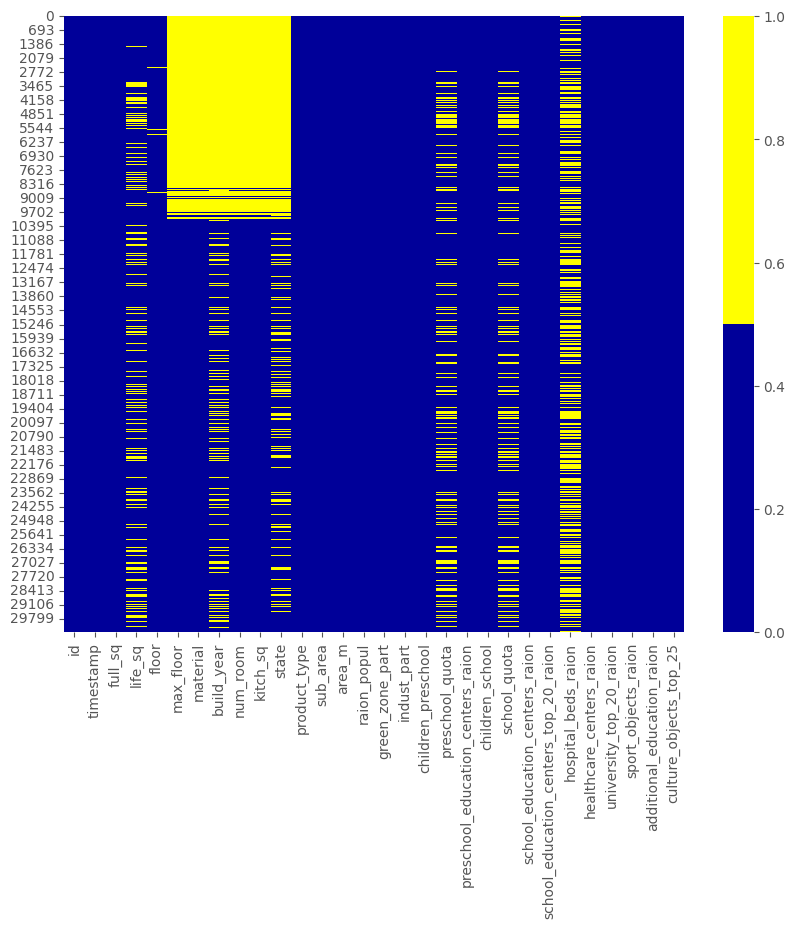

In [11]:
plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

Based on the heatmap below, we can learn the pattern of missing data for the first 30 columns. The horizontal axis shows the column names; the vertical axis shows the number of rows; the yellow color represents the missing data while the blue color is otherwise.


For example, the column life_sq has missing values across different rows. While the column max_floor has most of its missing values before ~10,000 rows. These patterns can potentially help us understand the reason for data being missing.

### missingno
The missingno library is a small toolset focused on missing data visualizations and utilities. So you can get the same missing data heatmap as above with shorter code.

<AxesSubplot: >

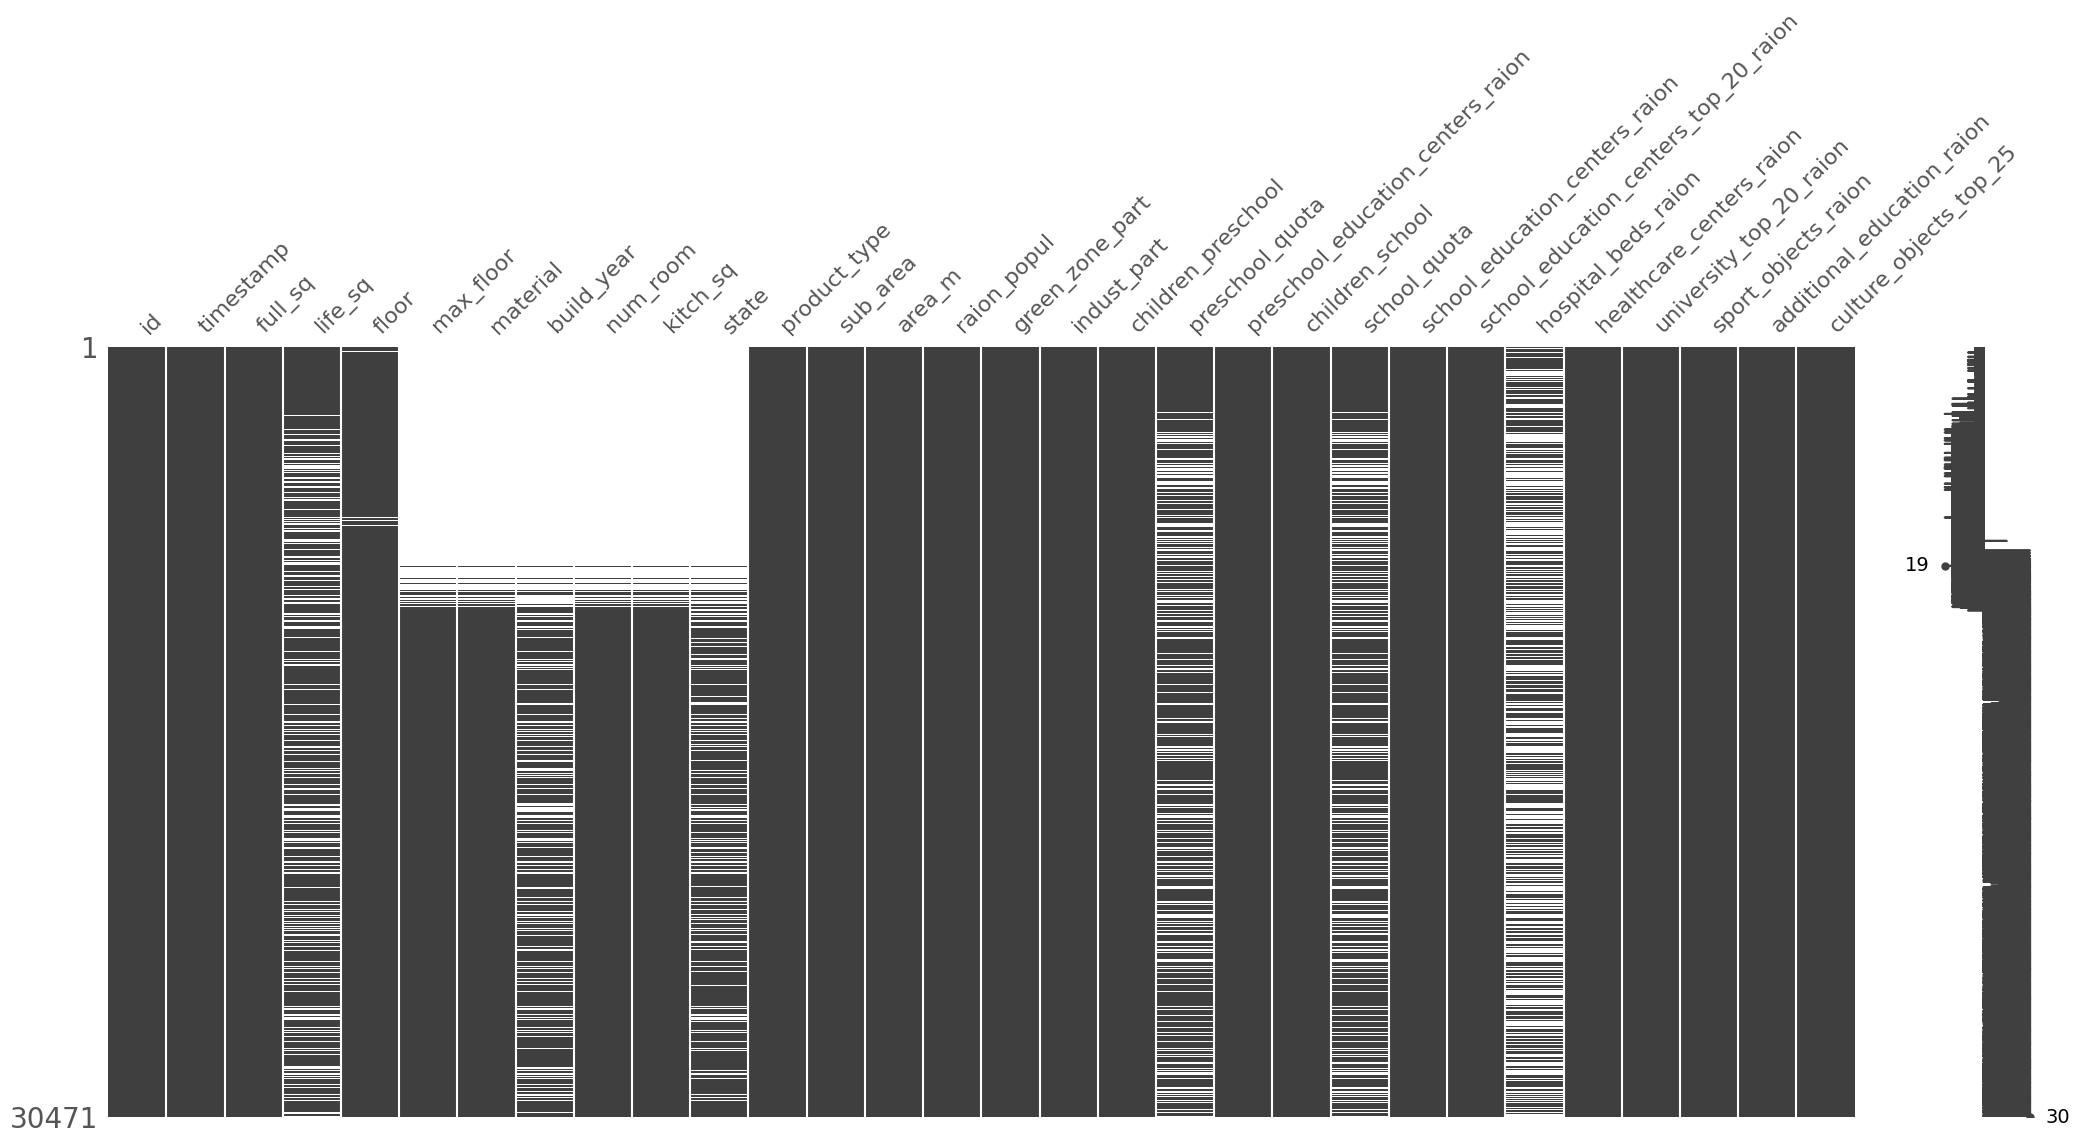

In [12]:
import missingno as msno
msno.matrix(df.iloc[:, :30])

### Method 3: missing data (by rows) histogram


<AxesSubplot: >

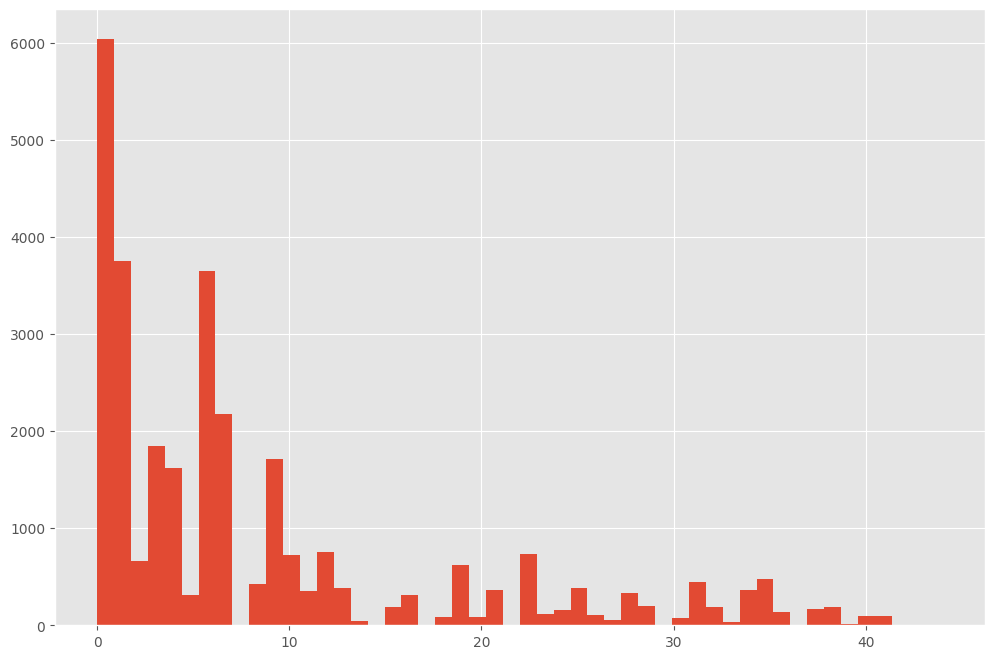

In [13]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

This histogram helps to identify the missing patterns among the 30,471 observations. For example, there are over 6,000 observations with no missing values, and close to 4,000 observations with 1 missing value.

### Technique 1: drop columns / features

Based on the previous code, pct_missing stores the list of columns and their missing data percentages.

In [14]:

pct_missing[pct_missing > .3]

max_floor                     0.314135
material                      0.314135
build_year                    0.446490
num_room                      0.314135
kitch_sq                      0.314135
state                         0.444980
hospital_beds_raion           0.473926
cafe_sum_500_min_price_avg    0.435857
cafe_sum_500_max_price_avg    0.435857
cafe_avg_price_500            0.435857
dtype: float64

filter for the columns with less than or equal to 30% missing, then apply the copy method to make a copy to the new DataFrame df_less_missing_cols. 

In [15]:
df_less_missing_cols = df.loc[:, pct_missing <= .3].copy() 
# equivalent to df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols.shape

(30471, 282)

This new DataFrame has the same number of rows as the original DataFrame, but only 282 columns. So we’ve successfully removed those 10 columns that have more than 30% missing.

### Technique 2: drop rows / observations

In [16]:
df_less_missing_rows = df[missing_by_row < 35].copy()
df_less_missing_rows.shape 
# equivalent to df.dropna(axis='index', thresh=292-35+1).shape

(29302, 292)

### Technique 3: impute the missing with constant values

Instead of dropping data, we can also replace the missing. An easy method is to impute the missing with constant values.

For example, we can impute the numeric columns with a value of -999 and impute the non-numeric columns with ‘_MISSING_’.



In [17]:
df_copy = df.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(-999)
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna('_MISSING_')

### Technique 4: impute the missing with statistics
 impute the numeric columns with their respective medians.

In [18]:

df_copy = df.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)

 impute the non-numeric columns with their most frequent values.

In [19]:
most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq

timestamp                             2014-12-16
product_type                          Investment
sub_area                     Poselenie Sosenskoe
culture_objects_top_25                        no
thermal_power_plant_raion                     no
incineration_raion                            no
oil_chemistry_raion                           no
radiation_raion                               no
railroad_terminal_raion                       no
big_market_raion                              no
nuclear_reactor_raion                         no
detention_facility_raion                      no
water_1line                                   no
big_road1_1line                               no
railroad_1line                                no
ecology                                     poor
Name: top, dtype: object

The variable most_freq stores the most common values for each non-numeric column.\
\
use it to fill in the missing.

In [20]:
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

### Irregular data (outliers)
The definition of outliers is broadly defined for numeric data only. So let’s focus on methods of spotting outliers of numeric columns.

### Method 1: descriptive statistics
Kurtosis is a statistical measure of ‘tailedness’. The higher kurtosis is often linked to the greater extremity of deviations (or outliers) in the data. So this is a single statistic to detect potential outliers.

In [21]:

df.kurt(numeric_only=True)[:10]

id               -1.199940
full_sq       12128.727462
life_sq       17058.409645
floor             1.731182
max_floor         6.595262
material          1.358512
build_year    16865.716093
num_room         13.292374
kitch_sq       4680.043742
state            88.399730
dtype: float64

Among the first 10 columns, we can see that life_sq has the highest kurtosis value. But note that the high value of kurtosis doesn’t guarantee outliers. 



the column’s common descriptive statistics.

In [22]:
df['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

For the column life_sq, we can see that the maximum value is 7,478, while the 75th percentile is only 43. The maximum value is an outlier.

### Method 2: histogram & box plot

<AxesSubplot: >

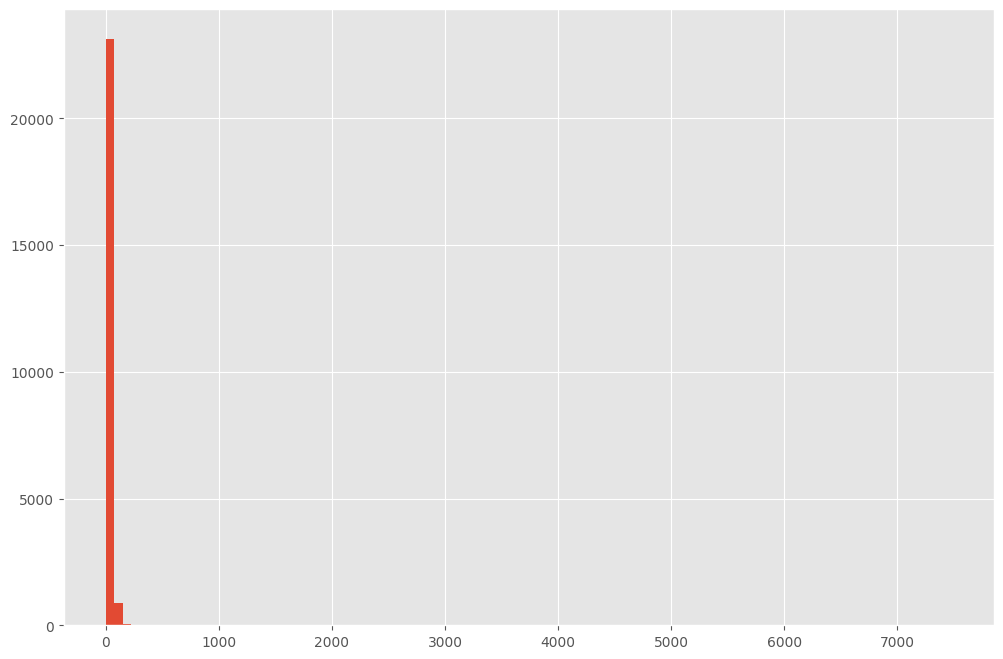

In [23]:

df['life_sq'].hist(bins=100)

<AxesSubplot: >

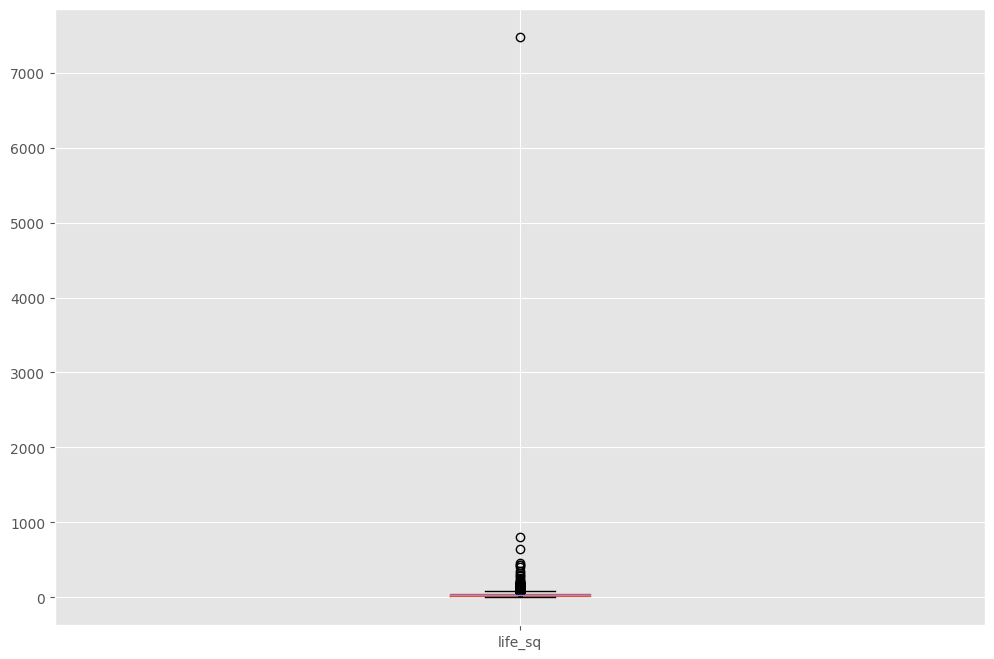

In [24]:
df.boxplot(column=['life_sq'])

From the box plot, we get a more clear view of the outliers. There is an outlier with a value of over 7,000. In fact, all the dots on the plot are considered outliers by the box plot definition.

### Method 3: bar chart

As mentioned, outliers are mainly defined for numeric data. But for non-numeric data, there could be irregular values too. We can use a bar chart to learn about the categories and their distributions.

For example, the column ecology has a reasonable distribution. But if there is a category with only one value called ‘extraordinary’, that could be considered an ‘outlier’.

<AxesSubplot: >

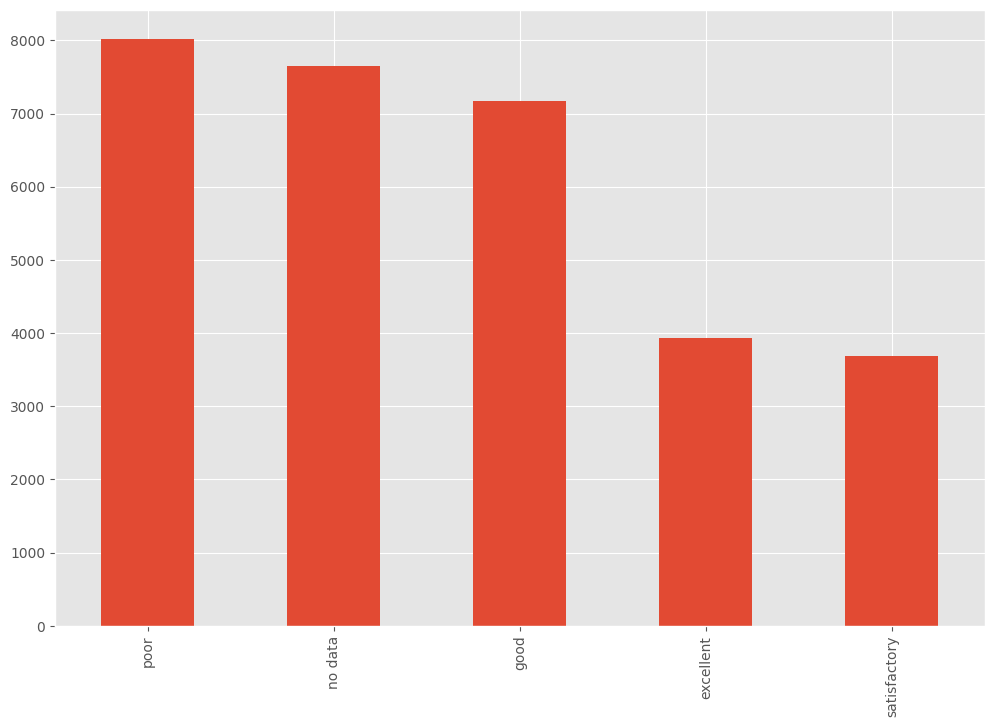

In [25]:
df['ecology'].value_counts().plot(kind='bar')

What to do?
While outliers are not hard to see, it is tricky to clean them. It depends on the dataset and the goal of the project.

The methods of handling outliers are somewhat similar to missing data. We could drop, replace, or even just keep them.

### Unnecessary data

### Unnecessary type 1: repetitive & uninformative

We can generate a list of columns with a high percentage of the same value. For example, we specify below to show columns with over 99.9% rows being the same value.

In [26]:

num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

What to do?\
If there is one column with a high percentage of the same value, we should look into it to see if it’s informative. We can drop them when they are not, e.g., when the column has 100% being the same value.

### Unnecessary type 2: irrelevant


We need to skim through the features to identify irrelevant ones. For example, a feature recording the temperature in the US wouldn’t provide direct insights into housing prices in Russia.

When the features are not serving the project’s goal, we can remove them. You could use the drop method in pandas.


### Unnecessary type 3: duplicates

**Duplicates type 1: all columns based**

Such duplicate occurs when all the columns’ values within the observations are the same.\
\
We can use the duplicated method to grab the boolean values of whether a row is duplicated, and then use it to filter for duplicated rows from df.


In [27]:
df[df.duplicated()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc


There are no two rows that look exactly the same. So this returns 0 rows.
\
If there were any duplicates, we could remove them. We can use the drop_duplicates method. But this will return the same DataFrame since there weren’t any duplicates.

In [28]:
df.drop_duplicates()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


### Duplicates type 2: key columns based
Instead of looking at all columns, sometimes we want to detect duplicates based on a set of identifiers (columns).\

first drop id, and then see if there are duplicated rows from the DataFrame.



In [29]:
df[df.drop(columns=['id']).duplicated()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
3359,3362,2012-08-27,59,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,4,2,0,3,15,1,0,24,4,4506800
4328,4331,2012-10-22,61,NaN,18.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,5,4,0,1,32,5,8248500
6991,6994,2013-04-03,42,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,3,2,0,2,16,1,0,20,4,3444000
8059,8062,2013-05-22,68,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,3,2,0,2,16,1,0,20,4,5406690
8653,8656,2013-06-24,40,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,1,0,0,4,6,0,0,4,1,4112800
14004,14007,2014-01-22,46,28.0,1.0,9.0,1.0,1968.0,2.0,5.0,...,10,1,0,13,15,1,1,61,4,3000000
17404,17407,2014-04-15,134,134.0,1.0,1.0,1.0,0.0,3.0,0.0,...,0,0,0,0,1,0,0,0,0,5798496
26675,26678,2014-12-17,62,NaN,9.0,17.0,1.0,NaN,2.0,1.0,...,371,141,26,150,249,2,105,203,13,6552000
28361,28364,2015-03-14,62,NaN,2.0,17.0,1.0,NaN,2.0,1.0,...,371,141,26,150,249,2,105,203,13,6520500
28712,28715,2015-03-30,41,41.0,11.0,17.0,1.0,2016.0,1.0,41.0,...,2,2,0,2,9,0,0,7,2,4114580


We could remove them and save the new dataset as df_dedupped. We can also compare the shapes of the two datasets (df and df_dedupped).

In [30]:
df_dedupped = df.drop(columns=['id']).drop_duplicates()

print(df.shape)
print(df_dedupped.shape)

(30471, 292)
(30461, 291)


For house sales, let’s assume that if two transactions have the same timestamp, full_sq, life_sq, floor, build_year, num_room, price_doc, they are duplicates. Let’s look at duplicates based on this set of columns. We can use the below code to show the duplicated rows based on those columns.

In [31]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df_grouped = df.fillna(-999).groupby(key)['id'].count()

df_grouped[df_grouped > 1]

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2012-08-27  59       -999.0   6.0    -999.0      -999.0    4506800      2
2012-09-05  43       -999.0   21.0   -999.0      -999.0    6229540      2
2012-10-22  61       -999.0   18.0   -999.0      -999.0    8248500      2
2013-04-03  42       -999.0   2.0    -999.0      -999.0    3444000      2
2013-05-22  68       -999.0   2.0    -999.0      -999.0    5406690      2
2013-06-24  40       -999.0   12.0   -999.0      -999.0    4112800      2
2013-08-30  40       -999.0   12.0   -999.0       1.0      4462000      2
2013-09-23  85       -999.0   14.0   -999.0       3.0      7725974      2
2013-12-05  40       -999.0   5.0    -999.0       1.0      4414080      2
2013-12-18  39       -999.0   6.0    -999.0       1.0      3700946      2
2014-01-22  46        28.0    1.0     1968.0      2.0      3000000      2
2014-04-15  134       134.0   1.0     0.0         3.0      5798496      2
2014-12-09  40       -999.0   17.0   -999.0

We can drop these duplicates based on the subset of key columns.

In [32]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 292)
(30455, 292)


#### Inconsistent type 1: capitalization
ub_area, which stores the name of different areas.

In [33]:
df['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

 lowercase (or uppercase) all letters.

In [34]:

df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: sub_area_lower, Length: 146, dtype: int64

### Inconsistent type 2: data types

In [35]:

df['timestamp']

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
30466    2015-06-30
30467    2015-06-30
30468    2015-06-30
30469    2015-06-30
30470    2015-06-30
Name: timestamp, Length: 30471, dtype: object

convert the column to a DateTime format and even extract the specific year, month, weekday, etc.

In [36]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

df[['timestamp_dt', 'year', 'month', 'weekday']].head()

,timestamp_dt,year,month,weekday
0,2011-08-20,2011,8,5
1,2011-08-23,2011,8,1
2,2011-08-27,2011,8,5
3,2011-09-01,2011,9,3
4,2011-09-05,2011,9,0


### Inconsistent type 3: typos of categorical values

We generate a new DataFrame, df_city_ex\
There is only one column that stores the city names. There are misspellings. For example, ‘torontoo’ and ‘tronto’ both refer to the city of ‘toronto’.\
\
The variable cities stores the 4 correct names of ‘toronto’, ‘vancouver’, ‘montreal’, and ‘calgary’.\
\
To identify typos, we use fuzzy logic matches. We use edit_distance from nltk, which measures the number of operations (e.g., substitution, insertion, deletion) needed to change from one string into another string.\

We calculate the distance between the actual values and the correct values.

In [37]:
df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})

cities = ['toronto', 'vancouver', 'montreal', 'calgary']
import nltk
from nltk.metrics import edit_distance
for city in cities:
    df_city_ex[f'city_distance_{city}'] = df_city_ex['city'].map(lambda x: edit_distance(x, city))

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,torontoo,1,8,7,8
1,toronto,0,8,7,7
2,tronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancover,7,1,7,7
5,vancouvr,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


The typos have a smaller ‘distance’ from the correct value. Because they only differ by a couple of letters.\
\
We can set criteria to convert these typos to the correct values. For example, the below code sets all the values within 2 characters distance from ‘toronto’/’vancouver’ to be ‘toronto’/’vancouver’.

In [38]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,toronto,1,8,7,8
1,toronto,0,8,7,7
2,toronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancouver,7,1,7,7
5,vancouver,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


### Inconsistent type 4: addresses
run code to standardize them in case there are hidden issues

There is no address column in our housing dataset due to privacy. Let’s create a new dataset df_add_ex with a column address.

In [39]:
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


- lowercase the letters
- remove leading and trailing white spaces
- delete periods
- standardize wordings

In [40]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespaces.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '', regex=True) # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st', regex=True) # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt', regex=True) # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave', regex=True) # replace av with ave.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
